In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#(x_train,y_train),(x_test, y_test)=mnist.load_data()

<function matplotlib.pyplot.show(close=None, block=None)>

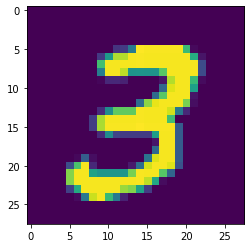

In [3]:
plt.imshow(x_train[7])
plt.show

In [4]:
x_train[7].shape

(28, 28)

In [5]:
#x_train = keras.utils.normalize(x_train, axis=1) # for normalization 
#x_test = keras.utils.normalize(x_test, axis=1)
x_test[1].shape

(28, 28)

In [6]:
model=tf.keras.models.Sequential()
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(10, activation=tf.nn.softmax))

In [10]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [11]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 112us/sample - loss: 0.1236 - accuracy: 0.9695 - val_loss: 0.1702 - val_accuracy: 0.9606
Epoch 2/5
60000/60000 [==============================] - 6s 98us/sample - loss: 0.1078 - accuracy: 0.9721 - val_loss: 0.1363 - val_accuracy: 0.9696
Epoch 3/5
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0981 - accuracy: 0.9753 - val_loss: 0.1516 - val_accuracy: 0.9653
Epoch 4/5
60000/60000 [==============================] - 6s 100us/sample - loss: 0.0986 - accuracy: 0.9746 - val_loss: 0.1811 - val_accuracy: 0.9648
Epoch 5/5
60000/60000 [==============================] - 7s 113us/sample - loss: 0.0805 - accuracy: 0.9788 - val_loss: 0.1513 - val_accuracy: 0.9637


In [12]:
model.save("hand_written_recogination")    #wb saving file search it 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: hand_written_recogination\assets


In [13]:
new1=tf.keras.models.load_model("hand_written_recogination")  #ne1.trainable=False( insde the model )

In [14]:
predication1 = new1.predict(x_test) 
#print(prediction)
#print(np.argmax(prediction[xy11]))

6


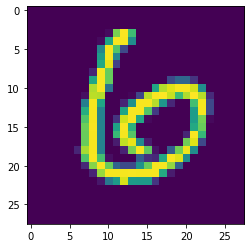

In [15]:
img_targ = 11
print(np.argmax(predication1[img_targ])) 
plt.imshow(x_test[img_targ])
plt.show()

# END

# --------------------------------------------------------------------------------------------------------------

# For predication of image from local repo....

In [19]:
# Model trained for blackbackground photo, choose the digit with black background

[0]


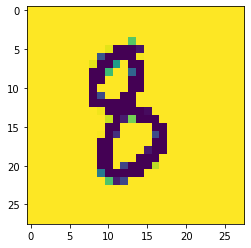

In [19]:
path3 ="C:/Users/wali11/Desktop/abc1.png"
xy11 = cv2.imread(path3)
#print(xy11.shape)

xy11 = cv2.resize(xy11, (28,28))
#print(xy11.shape)
#xy11 = np.reshape(xy11,[1,28,28,3])
#print(xy11.shape)
xy11 = cv2.cvtColor(xy11, cv2.COLOR_BGR2GRAY)
#xy11 = xy11/255
xy12 = np.reshape(xy11,[1,28,28])
#print(xy12.shape)

y_pred = new1.predict_classes(xy12)
print(y_pred)
plt.imshow(xy11)
plt.show()   